# Kursusgang 3

## Forelæsning
### tema

Auto-correlation

In [166]:
import pathlib

import sympy
import numpy
import scipy
from sympy.codegen.cnodes import sizeof


## Opgaveregning

Opgave 0:

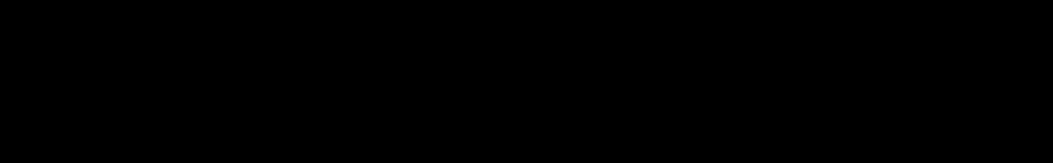
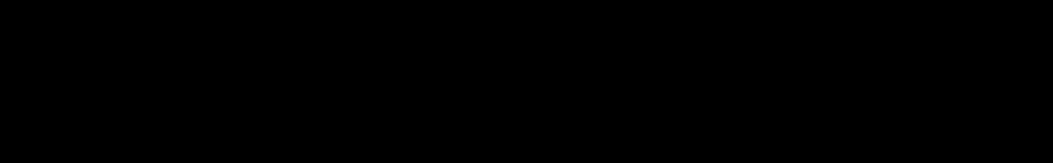
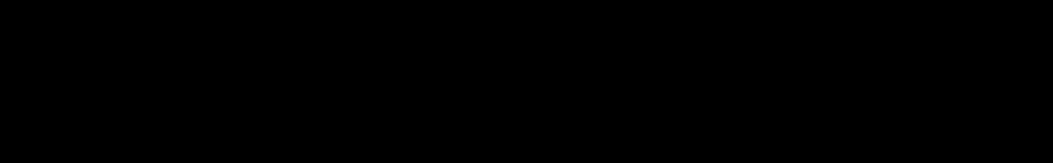
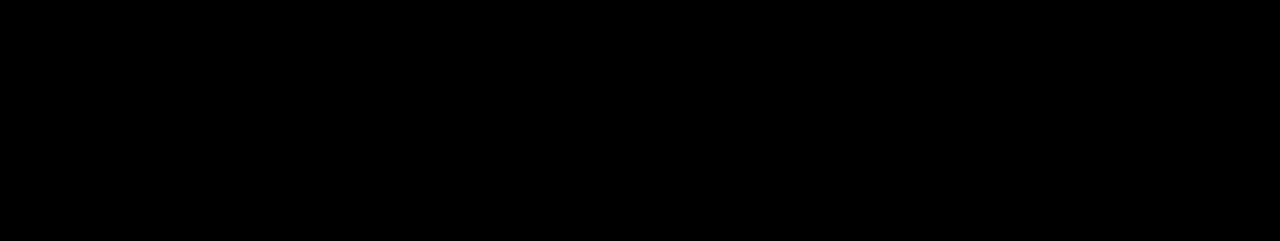
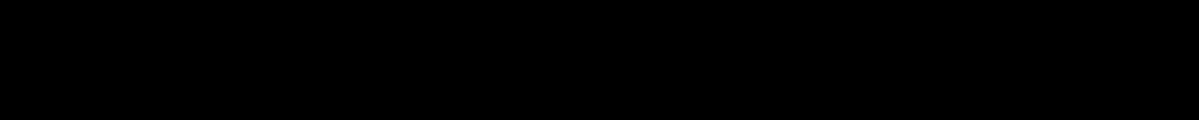
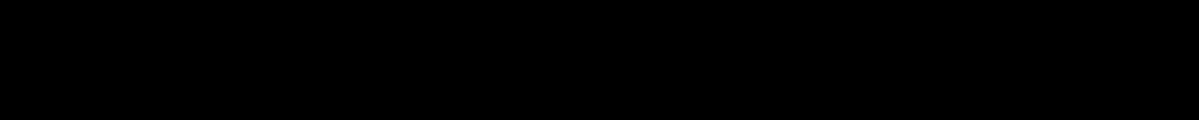
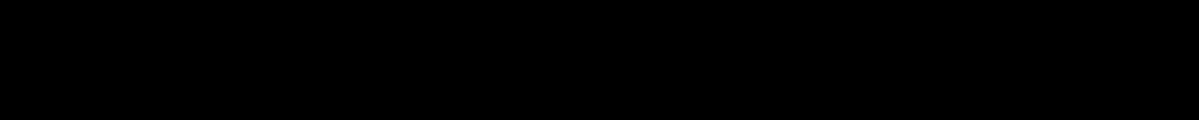

Mean RR interval:         94.3 [samples]
Mean QRS to T-peak delay: 26.8 [samples]


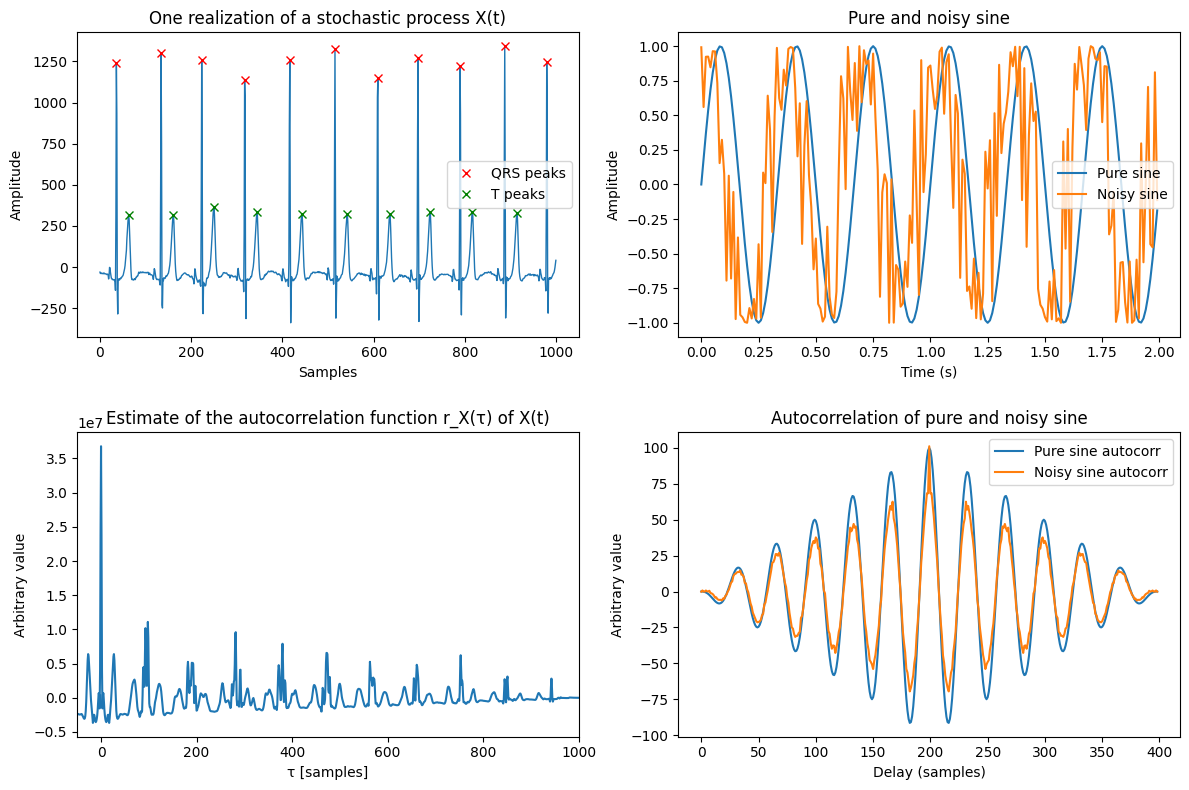

In [167]:
# %load KG3/example.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, correlate
from pathlib import Path

# --- Determine the path to the script and ECG file ---
# script_dir = Path("STOCH").parent  # folder where this script is located
ecg_file = "KG3/ecg.xlsx"  # ECG file in the same folder # insert relative path

# --- Load ECG ---
df = pd.read_excel(ecg_file)
ecg: np.ndarray[float] = df["ECG"].to_numpy(dtype=float)
# --- Plot raw ECG ---
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].plot(ecg, lw=1)
axs[0, 0].set_title("One realization of a stochastic process X(t)")
axs[0, 0].set_xlabel("Samples")
axs[0, 0].set_ylabel("Amplitude")

# --- Autocorrelation of ECG ---
rx = correlate(ecg, ecg, mode="full")
lags = np.arange(-len(ecg) + 1, len(ecg))
axs[1, 0].plot(lags, rx)
axs[1, 0].set_title("Estimate of the autocorrelation function r_X(τ) of X(t)")
axs[1, 0].set_xlabel("τ [samples]")
axs[1, 0].set_ylabel("Arbitrary value")
axs[1, 0].set_xlim([-50,len(ecg)])

# --- Peak detection ---
qrs_peaks, _ = find_peaks(ecg, height=800)
t_peaks, _ = find_peaks(ecg, height=100, width=5)

# Plot detected peaks
axs[0, 0].plot(qrs_peaks, ecg[qrs_peaks], "rx", label="QRS peaks")
axs[0, 0].plot(t_peaks, ecg[t_peaks], "gx", label="T peaks")
axs[0, 0].legend()

# --- Compute HR and QRS-to-T delay ---
mean_rr = np.mean(np.diff(qrs_peaks))
mean_qrs_t_delay = np.mean(t_peaks[:10] - qrs_peaks[:10])

print(f"Mean RR interval:         {mean_rr:.1f} [samples]")
print(f"Mean QRS to T-peak delay: {mean_qrs_t_delay:.1f} [samples]")

# --- Autocorrelation of pure and noisy sine waves ---
t = np.arange(0, 2, 0.01)
x = np.sin(2 * np.pi * 3 * t)
xn = np.sin(2 * np.pi * 3 * t + 2 * np.random.rand(len(t)))

axs[0, 1].plot(t, x, label="Pure sine")
axs[0, 1].plot(t, xn, label="Noisy sine")
axs[0, 1].set_title("Pure and noisy sine")
axs[0, 1].set_xlabel("Time (s)")
axs[0, 1].set_ylabel("Amplitude")
axs[0, 1].legend()

rsin = correlate(x, x, mode="full")
rsinn = correlate(xn, xn, mode="full")

axs[1, 1].plot(rsin, label="Pure sine autocorr")
axs[1, 1].plot(rsinn, label="Noisy sine autocorr")
axs[1, 1].set_title("Autocorrelation of pure and noisy sine")
axs[1, 1].set_xlabel("Delay (samples)")
axs[1, 1].set_ylabel("Arbitrary value")
axs[1, 1].legend()

plt.tight_layout()
plt.show()


## opgave 1

0
1
2
3
4
5
6
7
8
9
10


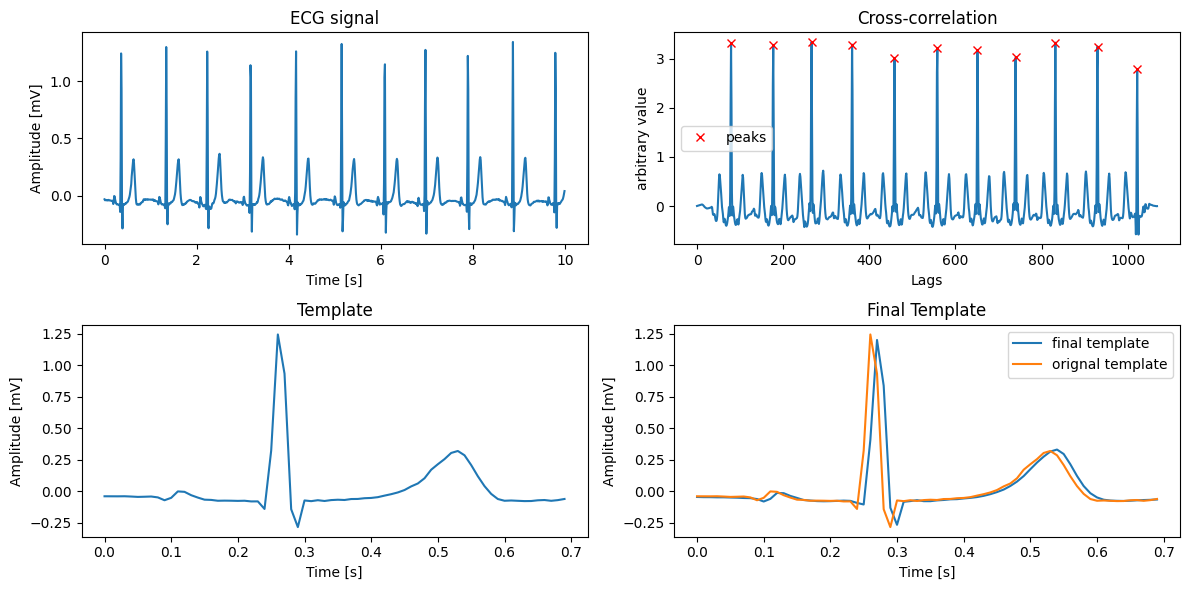

79


In [171]:
# %load KG3/exercise1.py
# --- Python cross-correlation hint ---
# To compute cross-correlation in Python:
#   from scipy.signal import correlate
#   correlate(signal1, signal2, mode='full')
# Or using numpy:
#   np.correlate(signal1, signal2, mode='full')
# See documentation:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html
# https://numpy.org/doc/stable/reference/generated/numpy.correlate.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- Load ECG from Excel as a normal DataFrame ---

ecg_file = "KG3/ecg.xlsx" # insert relative path
df = pd.read_excel(ecg_file)  # Assumes first row is header
ecg = df["ECG"].to_numpy() / 1000  # Scale from µV to mV

# --- Define template ---
template = ecg[10:80]  # Python uses 0-based indexing (11:80 in MATLAB -> 10:80)

# --- Sampling info ---
Fs = 100  # Hz
N = len(ecg)
t = np.arange(N) / Fs  # time vector

# --- Plot ECG and template ---
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
fig.patch.set_facecolor("white")

##################################################################################################
########################################## the student solution ##################################
##################################################################################################
cross_correlation = correlate(ecg, template, mode="full")
lags = np.arange(len(cross_correlation))
cross_correlation_peak, _ = find_peaks(cross_correlation, height=2)
template_peak = np.zeros(shape=(len(cross_correlation_peak), 70))
for i in range(len(cross_correlation_peak)):
    print(i)
    if cross_correlation_peak[i] < len(ecg):
        temp_array = ecg[cross_correlation_peak[i]-len(template):cross_correlation_peak[i]]
        template_peak[i] = temp_array
    else:
        template_peak = np.delete(template_peak, i,0)

final_template = sum(template_peak,0)/len(template_peak)


# Wide plot for ECG

axs[0, 0].plot(t, ecg)
axs[0, 0].set_title("ECG signal")
axs[0, 0].set_xlabel("Time [s]")
axs[0, 0].set_ylabel("Amplitude [mV]")
axs[0, 0].boxplot = False  # replicate 'box off'

# Plot template
axs[1, 0].plot(t[:70], template)
axs[1, 0].set_title("Template")
axs[1, 0].set_xlabel("Time [s]")
axs[1, 0].set_ylabel("Amplitude [mV]")




axs[0, 1].plot(lags, cross_correlation)
axs[0, 1].set_title("Cross-correlation")
axs[0, 1].set_xlabel("Lags")
axs[0, 1].set_ylabel("arbitrary value")
axs[0, 1].plot(cross_correlation_peak, cross_correlation[cross_correlation_peak], "rx", label="peaks")
axs[0, 1].legend()

axs[1, 1].plot(t[:70], final_template, label="final template")
axs[1, 1].plot(t[:70], template, label="orignal template")
axs[1, 1].set_title("Final Template")
axs[1, 1].set_xlabel("Time [s]")
axs[1, 1].set_ylabel("Amplitude [mV]")
axs[1, 1].legend()


plt.tight_layout()
plt.show()

print(cross_correlation_peak[0])